### Capstone: Diabetic Data

##### Beginning steps: Import libraries & data

In [3]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt #Library for charting data
import seaborn as sns #Library for extra datasets, charting data
import plotly as plot #Library for interactive charts
import bokeh as bk #Library for interactive 
import datetime as dt
from datetime import datetime, timedelta
from datetime import date
import plotly.express as px
import dataquality as dq
import statanalysis as sa

In [4]:
diabetes = pd.read_csv('diabetic_data_python.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Create a copy
diabetes_ogcopy = diabetes
diabetes_ogcopy.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
''' There are various missing values in the data set, but are all marked as '?'. To accurately capture the number of
missing values in the dataset, need to replace the '?' with blank entires.'''

" There are various missing values in the data set, but are all marked as '?'. To accurately capture the number of\nmissing values in the dataset, need to replace the '?' with blank entires."

In [7]:
diabetes = diabetes.replace('?', '')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# Data quality check
dq.data_check(diabetes)

### Row & Col Count



(101766, 50)

### Top 5 Rows



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Bottom 5 Rows



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


### Data Information



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

None

### Duplicate count



0

### Missing Values Count



encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Unique Values Count



encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

### Descriptive Stats



,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


##### Action 1: Perform descriptive stat analysis for numerical features

In [10]:
# Analysis on number of lab procedures (nlp)
# Use created library, statanalysis
sa.basic_stats(diabetes['num_lab_procedures'], 'Number of Lab Procedures')

### Number of Lab Procedures



Average number:  43.0
Maximum value:  132
Minimum value:  1
Standard deviation:  19.67


In [11]:
sa.basic_stats(diabetes['num_procedures'], 'Number of Procedures')

### Number of Procedures



Average number:  1.0
Maximum value:  6
Minimum value:  0
Standard deviation:  1.71


In [12]:
sa.basic_stats(diabetes['num_medications'], 'Number of Medications')

### Number of Medications



Average number:  16.0
Maximum value:  81
Minimum value:  1
Standard deviation:  8.13


In [13]:
sa.basic_stats(diabetes['number_diagnoses'], 'Number of Diagnoses')

### Number of Diagnoses



Average number:  7.0
Maximum value:  16
Minimum value:  1
Standard deviation:  1.93


In [14]:
sa.basic_stats(diabetes['time_in_hospital'], 'Time in Hospital')

### Time in Hospital



Average number:  4.0
Maximum value:  14
Minimum value:  1
Standard deviation:  2.99


##### Action 2: Visualize the distribution of categorical features, race & gender

' Caucasians make up the majority of the dataset by a significant amount. Followed by that, African Americans are the next\nlargest group, with all others being much lower.'

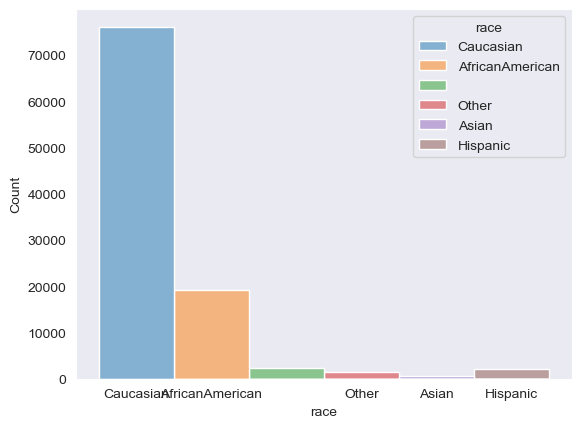

In [16]:
# Histogram of the distribution of race amongst our dataset
sns.set_style("dark")
sns.histplot(data = diabetes, x = 'race', hue = 'race')
''' Caucasians make up the majority of the dataset by a significant amount. Followed by that, African Americans are the next
largest group, with all others being much lower.'''

' Slighlty more females than males in our dataset.'

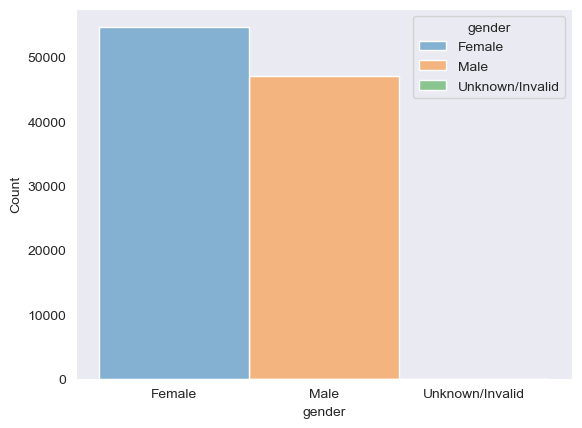

In [17]:
# Distribution of gender across our data set
sns.set_style("dark")
sns.histplot(data = diabetes, x = 'gender', hue = 'gender')
''' Slighlty more females than males in our dataset.'''

In [18]:
# What is the gender distribution for patients that have max glucose serume levels > 200 & >300?
# First, create a subset that only includes those levels
highglu = diabetes[(diabetes.max_glu_serum == '>200') | (diabetes.max_glu_serum == '>300')]
highglu.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
133,2265486,44279478,Caucasian,Male,[70-80),,6,1,1,6,...,No,No,No,No,No,No,No,Ch,Yes,NO
135,2292606,53848278,AfricanAmerican,Female,[70-80),,6,1,7,13,...,No,No,No,No,No,No,No,No,Yes,>30
162,2521974,80499960,Caucasian,Male,[80-90),,6,3,7,5,...,No,No,No,No,No,No,No,No,No,<30
192,2595612,89193870,Caucasian,Female,[40-50),,6,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
223,2791716,105589584,Hispanic,Female,[70-80),,6,1,1,6,...,No,No,No,No,No,No,No,No,No,<30


' Similar to the graph above, there are slighlty more females in this sub group than there are males.'

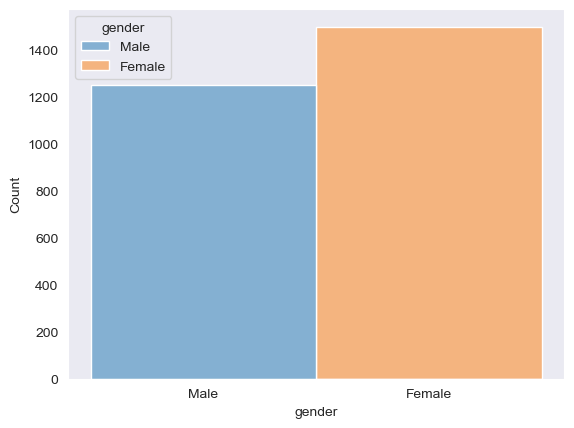

In [19]:
# Distribution of gender for patients that have very high glucose levels (>200 & >300)
sns.set_style("dark")
sns.histplot(data = highglu, x = 'gender', hue = 'gender')
''' Similar to the graph above, there are slighlty more females in this sub group than there are males.'''

' Age distribution is skewed to the left, indicating that the majority of the age ranges in the data fall above the mean.\nThe two groups with the largest number of paitents are [60-70) & [70-80), having over 20,000 & 25,000 patients respectively.\nGroups that are significantly lower are [0-10), [10-20), [20-30), [30-40), [40-50), & [90-100), which all fall under 10,000 patients.'

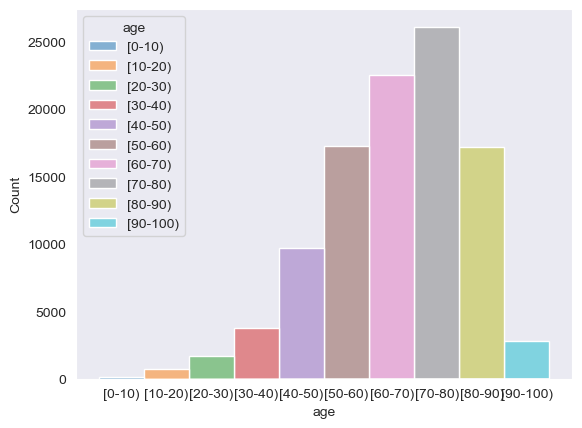

In [20]:
# Distribution of age across our data set
sns.set_style("dark")
sns.histplot(data = diabetes, x = 'age', hue = 'age')
''' Age distribution is skewed to the left, indicating that the majority of the age ranges in the data fall above the mean.
The two groups with the largest number of paitents are [60-70) & [70-80), having over 20,000 & 25,000 patients respectively.
Groups that are significantly lower are [0-10), [10-20), [20-30), [30-40), [40-50), & [90-100), which all fall under 10,000 patients.'''

In [21]:
# What is the age distibution of age for patients that have max glucose serume levels > 200 & >300?
# First, sort highglu by 'age' so that our bar char will graph the ages in chronological order
highglu = highglu.sort_values(by = ['age'])
highglu.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
6711,32800740,25619643,Caucasian,Male,[10-20),,1,1,17,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3246,20317794,25944534,Caucasian,Female,[10-20),,5,6,17,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
8162,37362624,25885440,Caucasian,Female,[10-20),,5,1,17,2,...,No,Down,No,No,No,No,No,Ch,Yes,>30
35184,109275234,31404276,Caucasian,Male,[10-20),,6,1,7,4,...,No,No,No,No,No,No,No,Ch,Yes,NO
28771,94279956,110059965,Caucasian,Male,[10-20),,6,1,7,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


' This graph mimics a very similar pattern to the distribution of ages across the entire data set, excep with this visual there\nis a significant increase in the number of patients in the [70-80), becoming the age group with the highest number of patients.'

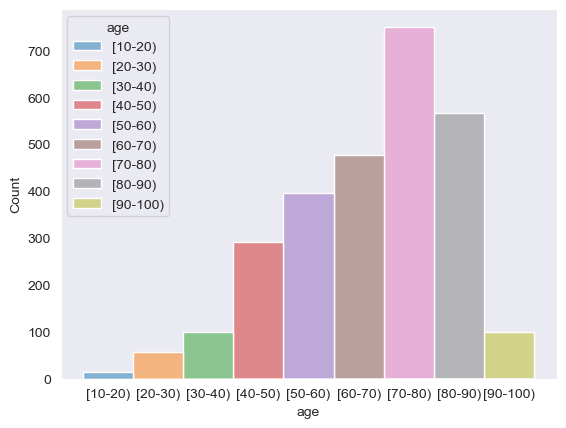

In [22]:
# Distribution of age for patients with max glucose serum >200 or > 300
sns.set_style("dark")
sns.histplot(data = highglu, x = 'age', hue = 'age')
''' This graph mimics a very similar pattern to the distribution of ages across the entire data set, excep with this visual there
is a significant increase in the number of patients in the [70-80), becoming the age group with the highest number of patients.'''

##### Action 3: Explore relationship between readmission status and age

In [24]:
redage = diabetes.groupby(['readmitted', 'age'])['patient_nbr'].count().reset_index()
redage = redage.rename(columns = {'patient_nbr':'patient_count'})
redage
    # For all three types of re-admission, the highest age group is [70-80).

,readmitted,age,patient_count
0,<30,[0-10),3
1,<30,[10-20),40
2,<30,[20-30),236
3,<30,[30-40),424
4,<30,[40-50),1027
5,<30,[50-60),1668
6,<30,[60-70),2502
7,<30,[70-80),3069
8,<30,[80-90),2078
9,<30,[90-100),310


In [25]:
# Do patients that have higher numbers of diagnoses get re-admitted more than patients with less diagnoses?
rediag = diabetes.groupby(['readmitted', 'number_diagnoses'])['patient_nbr'].count().reset_index()
rediag = rediag.rename(columns = {'patient_nbr':'patient_count'})
rediag

,readmitted,number_diagnoses,patient_count
0,<30,1,13
1,<30,2,62
2,<30,3,209
3,<30,4,457
4,<30,5,1043
5,<30,6,1058
6,<30,7,1119
7,<30,8,1254
8,<30,9,6125
9,<30,10,3


In [26]:
''' There seems to be a similar pattern across all three types of re-admission categories. There are significant increase
in the number of patients re-admitted as the number of diagnoses increases, up until 9 diagnoses. Afterward, they all drop
down drastically.'''

' There seems to be a similar pattern across all three types of re-admission categories. There are significant increase\nin the number of patients re-admitted as the number of diagnoses increases, up until 9 diagnoses. Afterward, they all drop\ndown drastically.'

In [27]:
# Is there a big difference between patients that are re-admitted that have high glucose levels vs. those who don't?
redhglu = highglu.groupby(['readmitted'])['patient_nbr'].count().reset_index()
redhglu

,readmitted,patient_nbr
0,<30,366
1,>30,1051
2,NO,1332


In [28]:
# Create a subset of patients that have normal or none for max_glu_ser
lowglu = diabetes[(diabetes.max_glu_serum == 'Norm') | (diabetes.max_glu_serum == 'None')]
lowglu.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
142,2309268,77475465,Caucasian,Female,[80-90),,6,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
144,2311404,95586993,Caucasian,Female,[90-100),,6,3,7,11,...,No,No,No,No,No,No,No,No,No,NO
153,2430276,69318126,Caucasian,Male,[70-80),,6,1,7,7,...,No,No,No,No,No,No,No,No,No,NO
170,2548314,48452823,Caucasian,Female,[60-70),,6,1,1,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
201,2660244,80156115,Caucasian,Female,[70-80),,6,1,7,3,...,No,No,No,No,No,No,No,No,No,NO


In [29]:
redlglu = lowglu.groupby(['readmitted'])['patient_nbr'].count().reset_index()
redlglu

,readmitted,patient_nbr
0,<30,295
1,>30,885
2,NO,1417


In [30]:
''' For patients that were re-admitted in over or under than 30 days, there is a higher patient count for the subset that have
higher glucose levels than those who don't. For patients that were not re-admitted, the counts are close, but the subset for
patients with lower glucose levels is higher.'''

" For patients that were re-admitted in over or under than 30 days, there is a higher patient count for the subset that have\nhigher glucose levels than those who don't. For patients that were not re-admitted, the counts are close, but the subset for\npatients with lower glucose levels is higher."

##### Action 4: Investigate correlations between numerical features

In [32]:
# Correlation between number of medications & number of diagnoses
sa.corr_info(diabetes, 'num_medications', 'number_diagnoses')

Correlation between these variables: 0.26
This is a weak correlation.


In [33]:
# Correlation between time in hospital & number of lab procedures
sa.corr_info(diabetes, 'time_in_hospital', 'num_lab_procedures')

Correlation between these variables: 0.32
This is a weak correlation.


In [34]:
# Correlation between number of medications & number of procedures
sa.corr_info(diabetes, 'num_medications', 'num_procedures')

Correlation between these variables: 0.39
This is a weak correlation.


##### Action 5: Analyze the distribution of medication changes and total medications taken

" The distribution among these 2 variables is quite heavily skewed to the right, meaning the majority of the values for number\nof medications taken, fall under the mean/ are on the lower side of our range of values.\nWe can also see there is a clear divide between the 'change' variable in terms of which option has the majority.\nAt about 15 medications and under, it's more common patients to not have changes in ther medication. At about 15 medication and over,\nwe see that it is more common for paitents to see a change in their medications. "

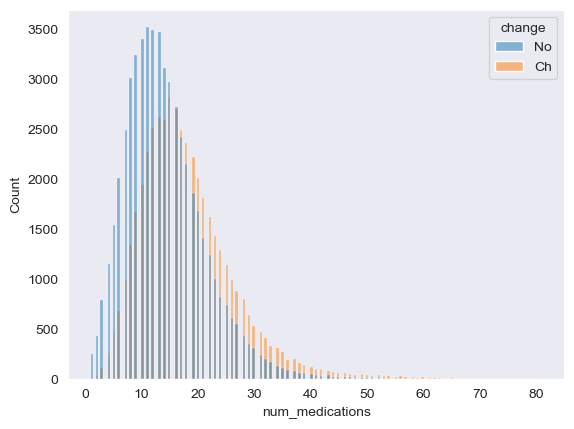

In [36]:
# Distribution of medication changes and total medications taken
sns.set_style("dark")
sns.histplot(data = diabetes, x = 'num_medications', hue = 'change')
''' The distribution among these 2 variables is quite heavily skewed to the right, meaning the majority of the values for number
of medications taken, fall under the mean/ are on the lower side of our range of values.
We can also see there is a clear divide between the 'change' variable in terms of which option has the majority.
At about 15 medications and under, it's more common patients to not have changes in ther medication. At about 15 medication and over,
we see that it is more common for paitents to see a change in their medications. '''

" This distribution is not as consistent throughout, although similar to the previous graph, there seems to be a divide\nbetween the 'change' variable. Underneath 15 medications, it is more common for patients to not have changes in their medications.\nAbove 15 medications, it is more common for patients to have changes in their medications."

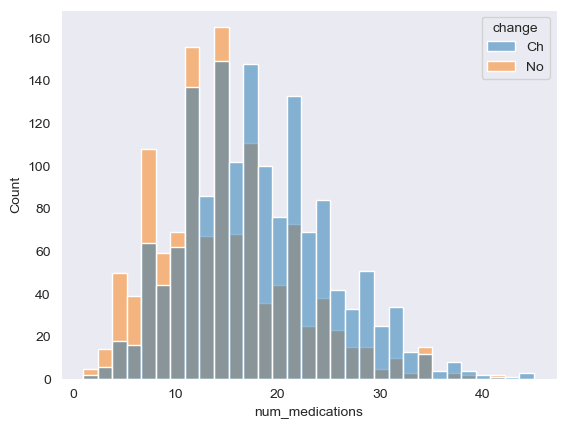

In [37]:
# Distribution of medication changes and total medications taken for patients that have max_glu_serum levels >200 or >300
sns.set_style("dark")
sns.histplot(data = highglu, x = 'num_medications', hue = 'change')
''' This distribution is not as consistent throughout, although similar to the previous graph, there seems to be a divide
between the 'change' variable. Underneath 15 medications, it is more common for patients to not have changes in their medications.
Above 15 medications, it is more common for patients to have changes in their medications.'''

In [38]:
''' The conclusion that can be drawn from these 2 graphs is that possibly the patients that have a very high number of medications
often see changes in them due to medications not yielding positive/effective results and therefore trying new ones.'''

' The conclusion that can be drawn from these 2 graphs is that possibly the patients that have a very high number of medications\noften see changes in them due to medications not yielding positive/effective results and therefore trying new ones.'

##### Action 6: Examine the distribution of diagnoses categories

In [40]:
# How many unique diagonses across the diff diag. cols?
print('Unique diag. for diag_1:', diabetes['diag_1'].nunique())
print('Unique diag. for diag_2:', diabetes['diag_2'].nunique())
print('Unique diag. for diag_3:', diabetes['diag_3'].nunique())

Unique diag. for diag_1: 717
Unique diag. for diag_2: 749
Unique diag. for diag_3: 790


In [41]:
# What are the top 10 diagnoses under diag_1?
diag = diabetes.groupby(['diag_1'])['patient_nbr'].count().reset_index().sort_values(by = 'patient_nbr', ascending = False)
diag = diag.rename(columns = {'patient_nbr':'patient_count'})
diag.head(10)

,diag_1,patient_count
277,428,6862
264,414,6581
541,786,4016
260,410,3614
326,486,3508
276,427,2766
330,491,2275
502,715,2151
476,682,2042
283,434,2028


In [42]:
# What about for patients that have high glucose levels?
diaghglu = highglu.groupby(['diag_1'])['patient_nbr'].count().reset_index().sort_values(by = 'patient_nbr', ascending = False)
diag = diag.rename(columns = {'patient_nbr':'patient_count'})
diaghglu.head(10)

,diag_1,patient_nbr
106,428,193
136,486,170
139,491,149
95,410,114
88,38,81
98,414,79
222,786,74
141,507,74
57,276,65
147,518,62


##### Action 7: Explore the distribution of patients across admission types, sources, and discharge dispositions

In [44]:
# Count of patients per admission type
adtype = diabetes.groupby('admission_type_id')['patient_nbr'].count().reset_index()
adtype = adtype.rename(columns = {'patient_nbr':'patient_count'})
adtype

,admission_type_id,patient_count
0,1,53990
1,2,18480
2,3,18869
3,4,10
4,5,4785
5,6,5291
6,7,21
7,8,320


In [45]:
''' The admission ID type with the highest number of patients by far is type 1, with almost 54K encounters of this type. The
rest of the admission types fall much lower, with the next 2 highest in the 18K range, and the rest of the data falling beneath 5.5K'''

' The admission ID type with the highest number of patients by far is type 1, with almost 54K encounters of this type. The\nrest of the admission types fall much lower, with the next 2 highest in the 18K range, and the rest of the data falling beneath 5.5K'

In [46]:
# What would patient count per admission type id, look like for patients who's A1C result is above normal?
# First, create a subset of patients who's A1C level is above normal
higha1c = diabetes[(diabetes.A1Cresult == '>7') | (diabetes.A1Cresult == '>8')]
higha1c.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
26,236316,40523301,Caucasian,Male,[80-90),,1,3,7,6,...,No,No,No,No,No,No,No,Ch,Yes,NO
74,955884,93196251,Caucasian,Female,[70-80),,1,3,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,>30
98,1257282,84488562,Other,Female,[50-60),,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
117,1968528,720936,Caucasian,Female,[70-80),,6,25,1,10,...,No,Down,No,No,No,No,No,Ch,Yes,>30
123,2092362,5041602,Caucasian,Female,[70-80),,6,25,7,11,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [47]:
# Count of patients per admission type, only in patients who's A1C results are higher than normal
a1c_adtype = higha1c.groupby('admission_type_id')['patient_nbr'].count().reset_index()
a1c_adtype = a1c_adtype.rename(columns = {'patient_nbr':'patient_count'})
a1c_adtype

,admission_type_id,patient_count
0,1,7207
1,2,2248
2,3,1348
3,4,2
4,5,351
5,6,826
6,8,46


In [48]:
''' More than half of the patient admissions within this subset of data fall under admission type 1, the count being above 7,000.
The following two types are significantly lower, type 2 & 3 with 2,248 & 1,348 patient counts respectively. The rest of the 
admission types fall below 900 patient counts.

This pattern is similar to the relationship between admission type and patient count in our original/unfiltered data set.'''

' More than half of the patient admissions within this subset of data fall under admission type 1, the count being above 7,000.\nThe following two types are significantly lower, type 2 & 3 with 2,248 & 1,348 patient counts respectively. The rest of the \nadmission types fall below 900 patient counts.\n\nThis pattern is similar to the relationship between admission type and patient count in our original/unfiltered data set.'

In [49]:
# Distribution of patients across admission source id
adstype = diabetes.groupby('admission_source_id')['patient_nbr'].count().reset_index()
adstype = adstype.rename(columns = {'patient_nbr':'patient_count'})
adstype

,admission_source_id,patient_count
0,1,29565
1,2,1104
2,3,187
3,4,3187
4,5,855
5,6,2264
6,7,57494
7,8,16
8,9,125
9,10,8


In [50]:
''' The admission source id with the highest count of patient is admission source id 7, with almost 60K patients. 
Significantly lower is the next the highest admission source id 1, with almost 30K patients. After that, the rest of the
admission source id patient counts are drastically lower.'''

' The admission source id with the highest count of patient is admission source id 7, with almost 60K patients. \nSignificantly lower is the next the highest admission source id 1, with almost 30K patients. After that, the rest of the\nadmission source id patient counts are drastically lower.'

In [51]:
# Distribution of patients across discharge dispotions
distype = diabetes.groupby('discharge_disposition_id')['patient_nbr'].count().reset_index()
distype = distype.rename(columns = {'patient_nbr':'patient_count'})
distype

,discharge_disposition_id,patient_count
0,1,60234
1,2,2128
2,3,13954
3,4,815
4,5,1184
5,6,12902
6,7,623
7,8,108
8,9,21
9,10,6


In [52]:
''' By a significant amount, the discharge dispotion id 1 is the most common, with 60K patients falling within this category.
The second highest discharge disposition id patient count is discharge id 3 & 6, with patient counts of 13,954 & 12,902 
respectively. After that, all discharge id's fall under 4K.'''

" By a significant amount, the discharge dispotion id 1 is the most common, with 60K patients falling within this category.\nThe second highest discharge disposition id patient count is discharge id 3 & 6, with patient counts of 13,954 & 12,902 \nrespectively. After that, all discharge id's fall under 4K."

In [53]:
# Is there any relationship between discharge id's and patients that have high glucose levels?
hg_distype = highglu.groupby('discharge_disposition_id')['patient_nbr'].count().reset_index()
hg_distype = hg_distype.rename(columns = {'patient_nbr':'patient_count'})
hg_distype

,discharge_disposition_id,patient_count
0,1,1072
1,2,119
2,3,680
3,4,4
4,5,44
5,6,444
6,7,21
7,8,4
8,10,3
9,11,98


In [54]:
''' The top 3 discharge codes are same as before, but with significantly less discrepancies between them and the 
following patient counts for other discharge id's.'''

" The top 3 discharge codes are same as before, but with significantly less discrepancies between them and the \nfollowing patient counts for other discharge id's."

##### Action 8: Identify and visualize any outliers in the dataset, especially in numerical features

' The number of lab procedures seems to have a fairly even distribution, since the peak of the values is very close to the mean\n(value of 43). There is one outlier toward the left of the graph, where the number of lab procedures is 1. This value has the highest\namount of occurrences throughout the data set.'

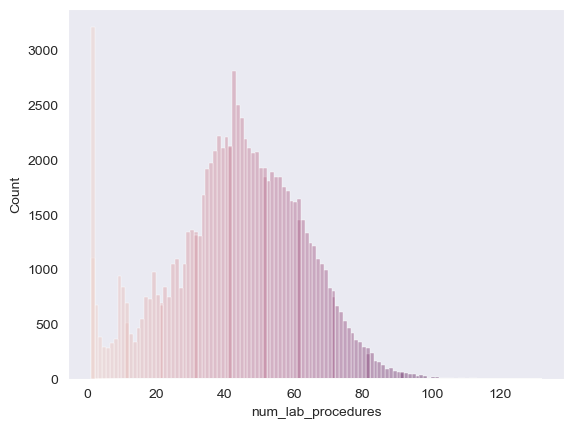

In [56]:
# What is the distribution of number of lab procedures?
sns.set_style("dark")
sns.histplot(data = diabetes, x = 'num_lab_procedures', hue = 'num_lab_procedures', legend = False)
''' The number of lab procedures seems to have a fairly even distribution, since the peak of the values is very close to the mean
(value of 43). There is one outlier toward the left of the graph, where the number of lab procedures is 1. This value has the highest
amount of occurrences throughout the data set.'''

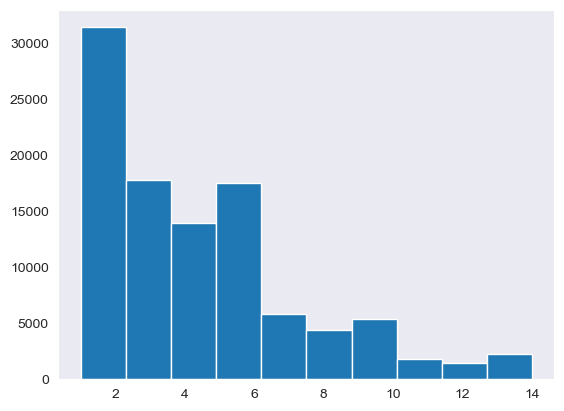

' Between the range of 3 and 6 days, the occurrences in the data set seem to be fairly equal, with a steep drop off after 6 days\nthat is consistent throughout the rest of the dataset. The time in hospital with the highest amount of occurrences is between\n1 to 2 days by a significant amount.'

In [57]:
# Distribution of time in hospital
plt.hist(diabetes['time_in_hospital'])
plt.show()
''' Between the range of 3 and 6 days, the occurrences in the data set seem to be fairly equal, with a steep drop off after 6 days
that is consistent throughout the rest of the dataset. The time in hospital with the highest amount of occurrences is between
1 to 2 days by a significant amount.'''

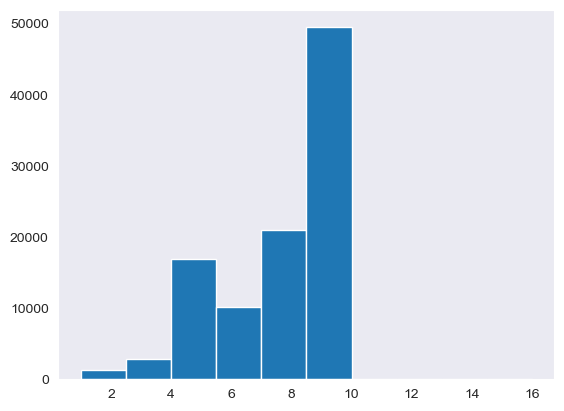

' It is most common for patients to have somehwere between 9 and 10 diagnoses. Between 4 and 8 diagnoses is fairly even, with a drop\noff for diagnoses between 5 and 7. The lowest are 1-4 diagnoses, and anything above 10 diagnoses.'

In [58]:
# Distribution of number of diagnoses
plt.hist(diabetes['number_diagnoses'])
plt.show()
''' It is most common for patients to have somehwere between 9 and 10 diagnoses. Between 4 and 8 diagnoses is fairly even, with a drop
off for diagnoses between 5 and 7. The lowest are 1-4 diagnoses, and anything above 10 diagnoses.'''